In [24]:
import pandas as pd

In [25]:
nba = pd.read_csv('/Users/Owner/Desktop/nba.csv', encoding='cp1252')
nba.head()

,ID,TEAM,VENUE,MATCH,DATE,WL,MIN,SCORE,FGM,FGA,...,FTP,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUSMINUS
0,1,GSW,A,GSW @ MEM,4/10/19,L,240,117,46,92,...,85.7,9,30,39,32,3,5,14,17,-15
1,1,MEM,H,MEM vs. GSW,4/10/19,W,240,132,48,98,...,83.3,15,34,49,25,9,0,11,18,15
2,2,ORL,A,ORL @ CHA,4/10/19,W,240,122,48,88,...,75.0,9,30,39,24,5,2,6,19,8
3,2,CHA,H,CHA vs. ORL,4/10/19,L,240,114,41,78,...,88.9,4,28,32,21,3,4,8,14,-8
4,3,MIN,A,MIN @ DEN,4/10/19,L,240,95,39,91,...,66.7,7,34,41,24,6,0,10,22,-4


In [26]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
nba['DATE']= pd.to_datetime(nba['DATE'])
nba.head()

,ID,TEAM,VENUE,MATCH,DATE,WL,MIN,SCORE,FGM,FGA,...,FTP,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUSMINUS
0,1,GSW,A,GSW @ MEM,2019-04-10,L,240,117,46,92,...,85.7,9,30,39,32,3,5,14,17,-15
1,1,MEM,H,MEM vs. GSW,2019-04-10,W,240,132,48,98,...,83.3,15,34,49,25,9,0,11,18,15
2,2,ORL,A,ORL @ CHA,2019-04-10,W,240,122,48,88,...,75.0,9,30,39,24,5,2,6,19,8
3,2,CHA,H,CHA vs. ORL,2019-04-10,L,240,114,41,78,...,88.9,4,28,32,21,3,4,8,14,-8
4,3,MIN,A,MIN @ DEN,2019-04-10,L,240,95,39,91,...,66.7,7,34,41,24,6,0,10,22,-4


In [27]:
#DATA VISUALIZATION/EXPLORATION

In [28]:
#the goal of this initial exploration is to explore certain trends and conclusions that are commonly known in the
#basketball world. The 3pt shot,rebounding,and home court advantage are amongst the most important attributes to 
#winning games in today's NBA. I want to explore if home teams generally do score more points than their visiting 
#rivals, the teams that take the most 3's, the teams that are most accurate from the 3pt line, 
#the correlation (if any) between offensive rebounds and points scored, and whether teams focus more on rebounding
#as playoffs approach.

In [29]:
import seaborn as sns
import statistics
import matplotlib.pyplot as plt

In [30]:
#average points scored per team

In [31]:
score_avg= nba.groupby('TEAM').SCORE.mean()
score_avg.index
score_avg.values

array([113.34146341, 112.24390244, 112.3902439 , 110.74390244,
       104.93902439, 104.47560976, 108.86585366, 110.67073171,
       107.04878049, 117.68292683, 113.91463415, 108.01219512,
       115.14634146, 111.76829268, 103.53658537, 105.70731707,
       118.12195122, 112.47560976, 115.43902439, 104.57317073,
       114.47560976, 107.31707317, 115.18292683, 107.5       ,
       114.65853659, 114.18292683, 111.65853659, 114.43902439,
       111.7195122 , 114.02439024])

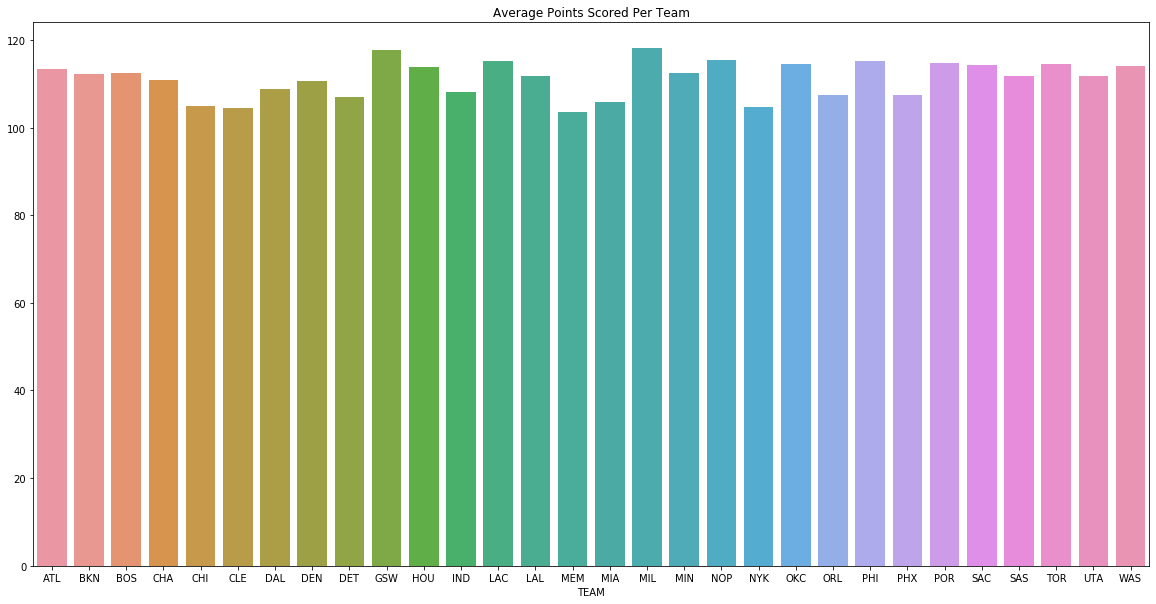

In [32]:
plt.figure(figsize=(20,10))
plt.title('Average Points Scored Per Team')
sns.barplot(score_avg.index,score_avg.values)

In [33]:
#differences in performance between Home and Away teams

In [34]:
#home/away points scored

In [35]:
def HomeAway(x):
    if '@' in x:
        return 'A'
    else: 
        return 'H'

In [36]:
nba['VENUE']=nba['MATCH'].apply(HomeAway)

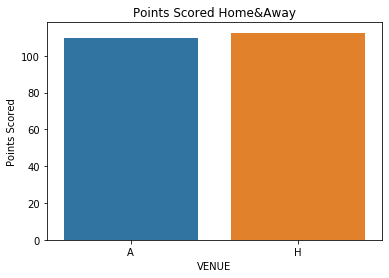

In [37]:
x = nba.groupby('VENUE').SCORE.mean()
plt.title('Points Scored Home&Away')
plt.ylabel('Points Scored')
sns.barplot(x.index,x.values)
#home team usually scores more points on average

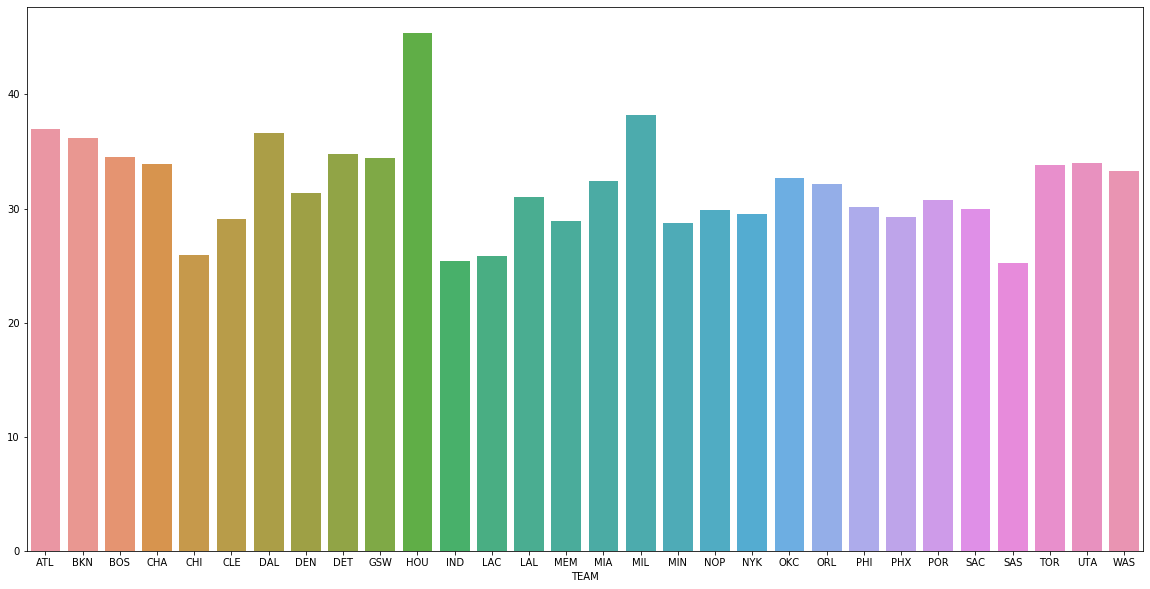

In [38]:
trigger=nba.groupby('TEAM').THREESATTEMPTS.mean()
plt.figure(figsize=(20,10))
sns.barplot(trigger.index,trigger.values)
#houston by far the most trigger happy team from 3

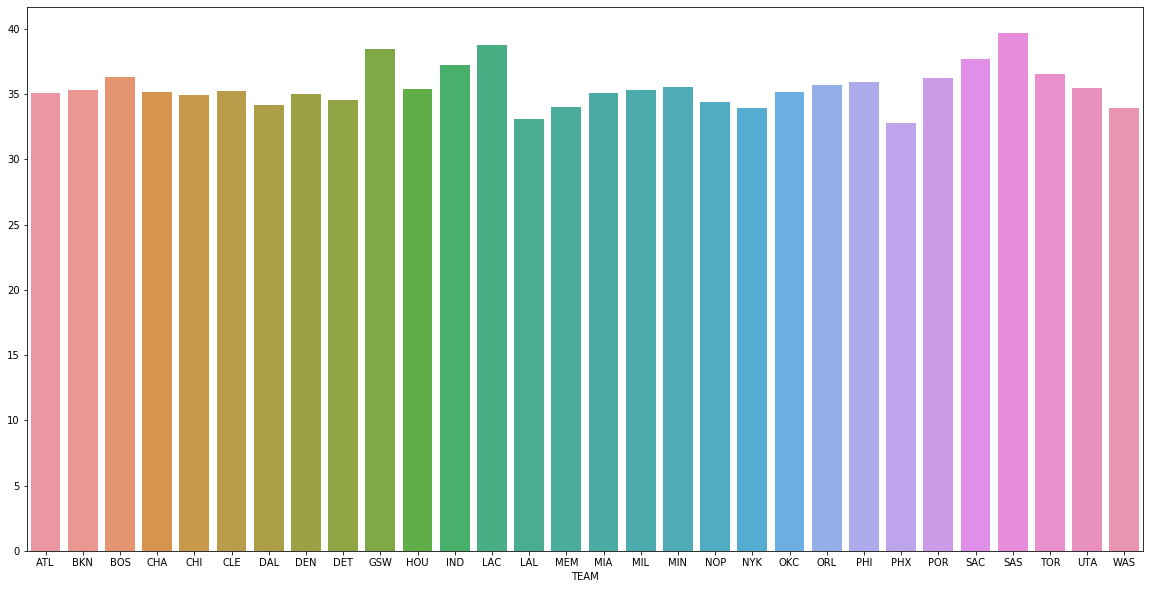

In [39]:
sniper = nba.groupby('TEAM').THREEPCT.mean()
plt.figure(figsize=(20,10))
sns.barplot(sniper.index,sniper.values)
#spurs most efficient with their attempts 

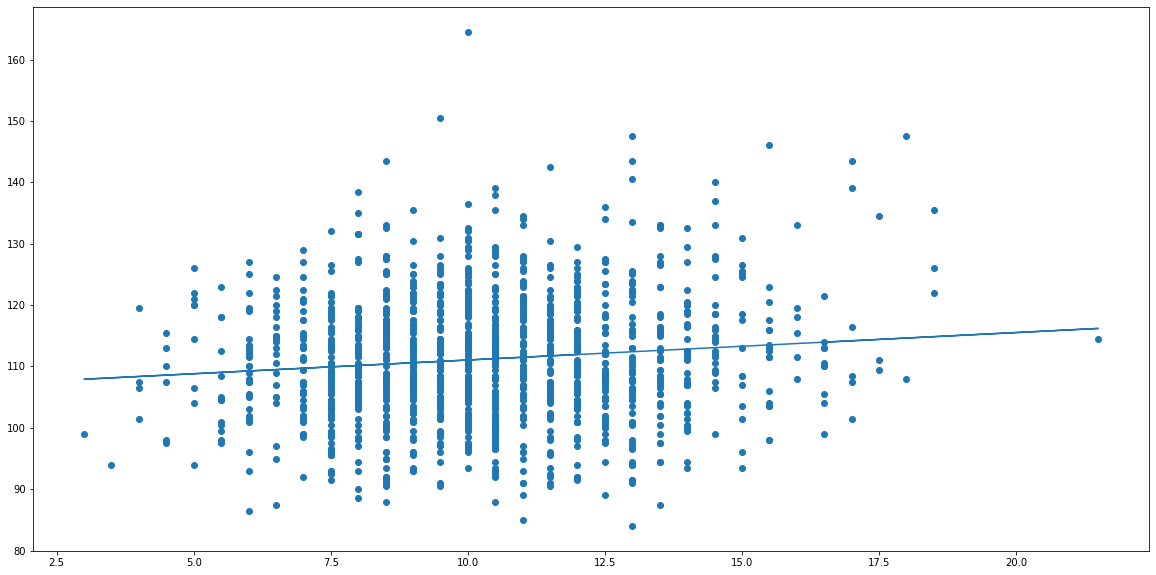

In [40]:
#does more offensive rebounds correlate to more points within a game
import numpy as np
mulligan = nba.groupby('ID').OREB.mean()
score = nba.groupby('ID').SCORE.mean()

x=mulligan.values
y=score.values

m,b = np.polyfit(x, y,1)
plt.figure(figsize =(20,10))
plt.scatter(x,y)
plt.plot(x, m*x+b)
#more offensive rebounds appears to equal more points

In [41]:
#rebounds are considered a hustle stat in basketball, 
#how does the amount of rebounds per game change as teams get closer to the playoffs

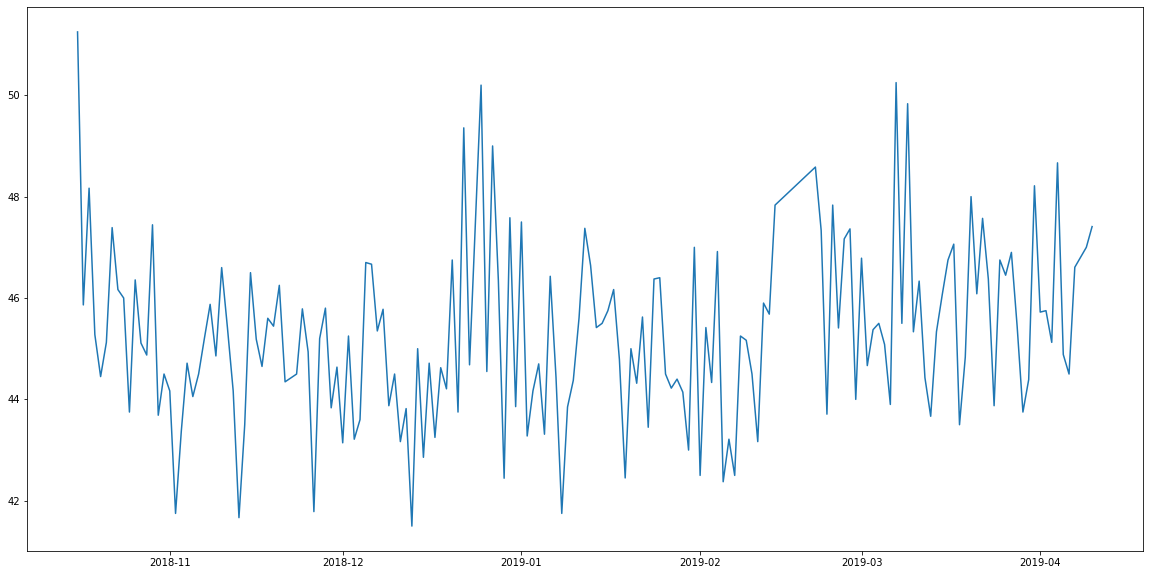

In [42]:
hustle = nba.groupby('DATE').REB.mean()
plt.figure(figsize=(20,10))
plt.plot(hustle.index,hustle.values)

In [43]:
#you can see that teams begin the year with a lot of energy and wind down into the winter then
#after the all star break(February) teams are grabbing more rebounds which is generally an 
#indicator of increased effort as playoffs approach(Mid/Late April)